In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (update path if needed)
clean_path = r"C:\Users\Administrator\Desktop\New folder\Chicago_Population_Counts_Cleaned.txt"
feat_path = r"C:\Users\Administrator\Desktop\New folder\Chicago_Population_Counts_Feature_Engineered_Selected.txt"

df_clean = pd.read_csv(clean_path)
df_feat = pd.read_csv(feat_path)

# Preview the feature-engineered dataset
df_feat.head()


,Population - Total,Zip Code,community_area_number,community,gender_ratio M:F,dependency_ratio,pct_latinx,pct_black,pct_white,pct_asian,pct_other,youth_proportion
0,14804,60601,32,LOOP,0.79,0.17,0.08,0.06,0.55,0.26,0.05,0.07
1,1142,60602,32,LOOP,1.11,0.12,0.27,0.03,0.47,0.09,0.14,0.10
2,1275,60603,32,LOOP,1.14,0.13,0.06,0.06,0.57,0.31,0.00,0.03
3,687,60604,32,LOOP,0.63,0.09,0.04,0.10,0.75,0.10,0.00,0.01
4,32077,60605,33,NEAR SOUTH SIDE,0.96,0.18,0.09,0.14,0.57,0.15,0.04,0.09


In [2]:
# Normalize column names
def normalize_cols(columns):
    return [c.strip().lower().replace(" ", "_").replace("-", "_").replace(":", "") for c in columns]

df_clean.columns = normalize_cols(df_clean.columns)
df_feat.columns = normalize_cols(df_feat.columns)

# Exclude identifiers that should not be treated as numeric
id_cols = ["community_area_number", "zip_code", "community"]
numeric_cols = [c for c in df_feat.select_dtypes(include=[np.number]).columns if c not in id_cols]
cat_cols = [c for c in df_feat.columns if c not in numeric_cols and c not in id_cols]

df_feat.head()

,population___total,zip_code,community_area_number,community,gender_ratio_mf,dependency_ratio,pct_latinx,pct_black,pct_white,pct_asian,pct_other,youth_proportion
0,14804,60601,32,LOOP,0.79,0.17,0.08,0.06,0.55,0.26,0.05,0.07
1,1142,60602,32,LOOP,1.11,0.12,0.27,0.03,0.47,0.09,0.14,0.10
2,1275,60603,32,LOOP,1.14,0.13,0.06,0.06,0.57,0.31,0.00,0.03
3,687,60604,32,LOOP,0.63,0.09,0.04,0.10,0.75,0.10,0.00,0.01
4,32077,60605,33,NEAR SOUTH SIDE,0.96,0.18,0.09,0.14,0.57,0.15,0.04,0.09


In [3]:
# Summary statistics for numeric features only
display(df_feat[numeric_cols].describe().T)

# Missing values (count + percentage)
missing = df_feat.isna().sum().to_frame("missing_count")
missing["missing_percent"] = (df_feat.isna().mean() * 100).round(2)
display(missing)

# Categorical cardinality
cardinality = pd.Series({c: df_feat[c].nunique() for c in cat_cols}, name="unique_values").to_frame()
display(cardinality)

,count,mean,std,min,25%,50%,75%,max
population___total,58.0,48153.500000,25598.546996,687.00,30095.5000,48107.500,67111.5000,107487.00
gender_ratio_mf,58.0,0.951724,0.110408,0.63,0.8800,0.960,1.0200,1.27
dependency_ratio,58.0,0.387414,0.162508,0.09,0.2625,0.440,0.5200,0.63
pct_latinx,58.0,0.222586,0.210726,0.02,0.0625,0.140,0.3775,0.83
pct_black,58.0,0.287241,0.329278,0.00,0.0400,0.125,0.5300,0.95
pct_white,58.0,0.376034,0.266603,0.01,0.0825,0.450,0.5775,0.81
pct_asian,58.0,0.084828,0.093175,0.00,0.0100,0.055,0.1175,0.37
pct_other,58.0,0.028448,0.020842,0.00,0.0125,0.030,0.0400,0.14
youth_proportion,58.0,0.185862,0.076020,0.01,0.1300,0.215,0.2500,0.32


,missing_count,missing_percent
population___total,0,0.0
zip_code,0,0.0
community_area_number,0,0.0
community,0,0.0
gender_ratio_mf,0,0.0
dependency_ratio,0,0.0
pct_latinx,0,0.0
pct_black,0,0.0
pct_white,0,0.0
pct_asian,0,0.0


,unique_values


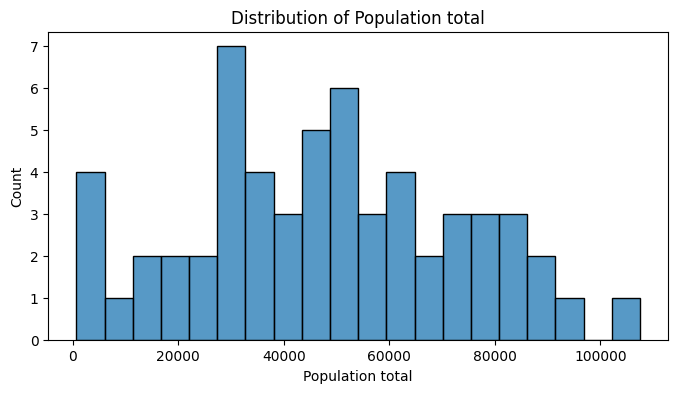

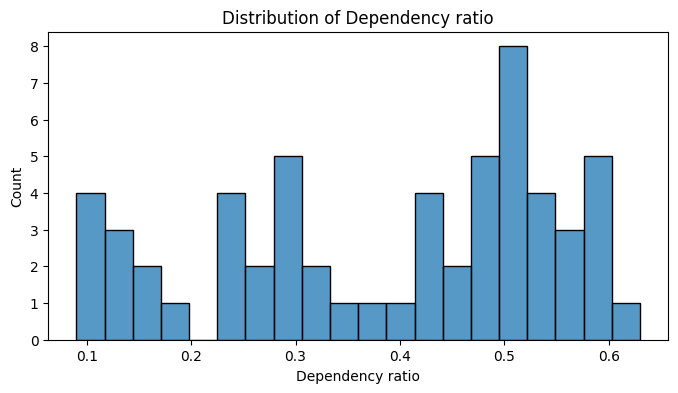

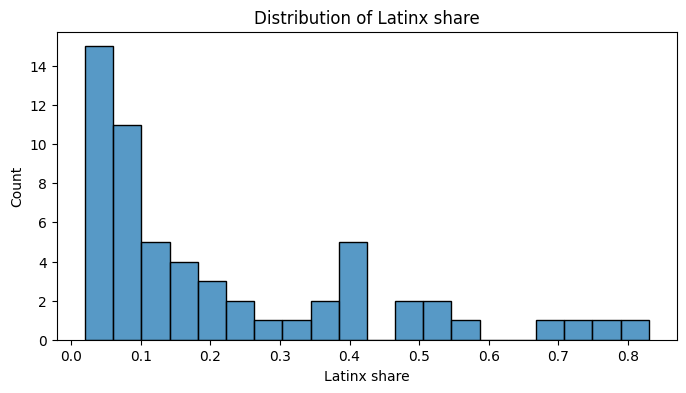

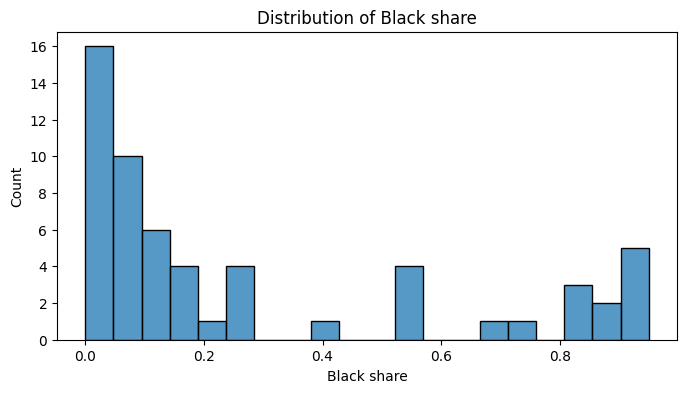

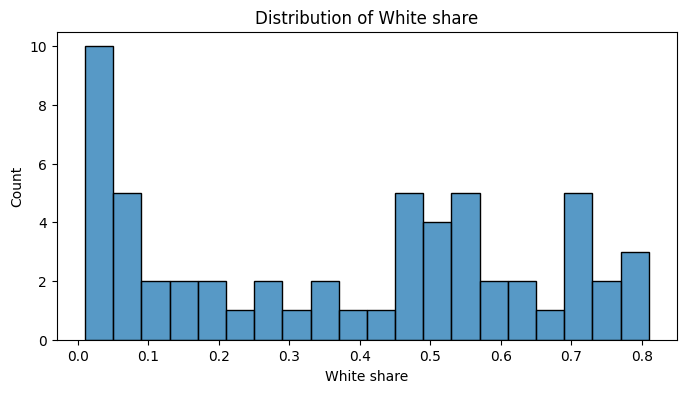

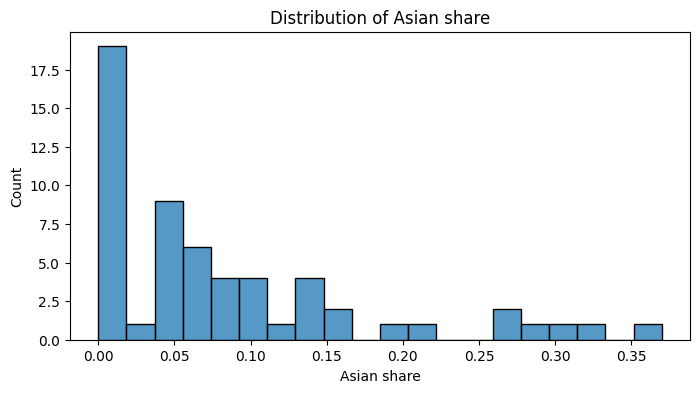

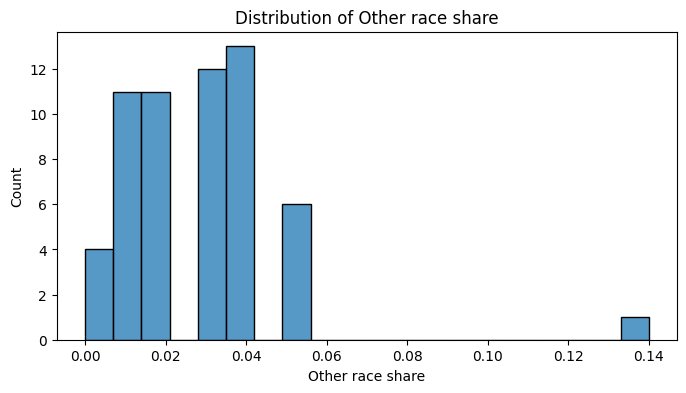

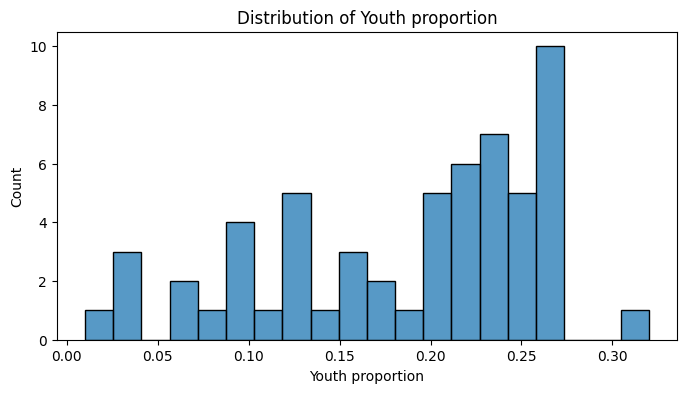

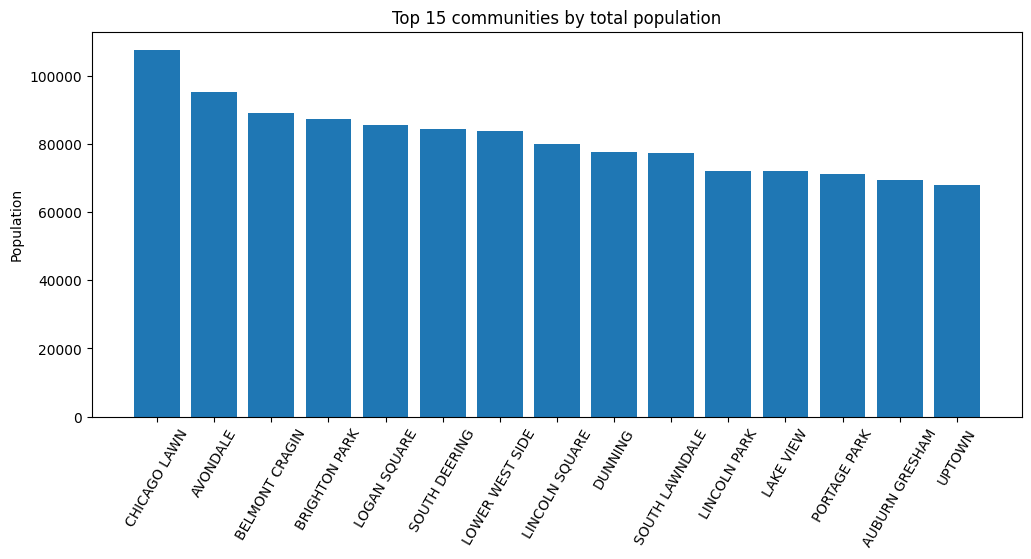

In [ ]:
# Distribution plots for key variables

target_cols = {
    'population___total': 'Population total',
    'dependency_ratio': 'Dependency ratio',
    'gender_ratio_m:f': 'Gender ratio M:F',
    'pct_latinx': 'Latinx share',
    'pct_black': 'Black share',
    'pct_white': 'White share',
    'pct_asian': 'Asian share',
    'pct_other': 'Other race share',
    'youth_proportion': 'Youth proportion',
}

# Histograms for numeric features
for col, label in target_cols.items():
    if col in df_feat.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df_feat[col], bins=20, kde=False)
        plt.title(f"Distribution of {label}")
        plt.xlabel(label)
        plt.ylabel("Count")
        plt.show()

# Top 15 communities by population
if "community" in df_feat.columns and "population___total" in df_feat.columns:
    top_pop = df_feat[['community','population___total']].sort_values('population___total', ascending=False).head(15)
    plt.figure(figsize=(12,5))
    plt.bar(top_pop['community'], top_pop['population___total'])
    plt.title("Top 15 communities by total population")
    plt.xticks(rotation=60)
    plt.ylabel("Population")
    plt.show()



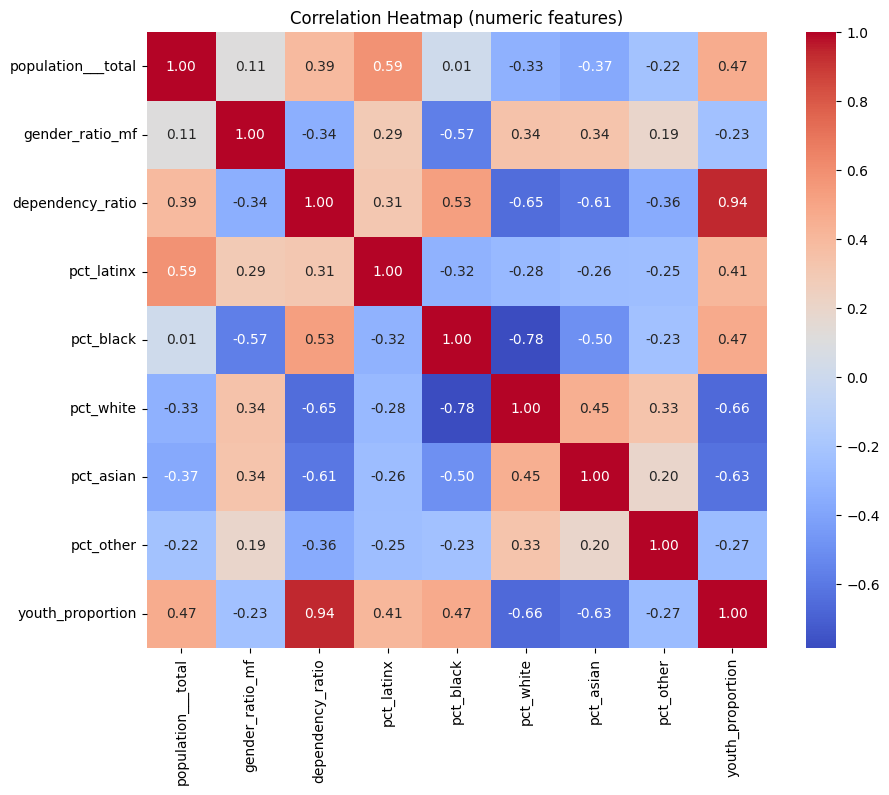

,population___total,gender_ratio_mf,dependency_ratio,pct_latinx,pct_black,pct_white,pct_asian,pct_other,youth_proportion
population___total,1.000000,0.109468,0.392387,0.587934,0.012181,-0.328816,-0.371878,-0.220696,0.468568
gender_ratio_mf,0.109468,1.000000,-0.342269,0.292606,-0.570942,0.343006,0.337698,0.193308,-0.227180
dependency_ratio,0.392387,-0.342269,1.000000,0.312450,0.526832,-0.649594,-0.608261,-0.363788,0.942778
pct_latinx,0.587934,0.292606,0.312450,1.000000,-0.323150,-0.277617,-0.261200,-0.250326,0.411584
pct_black,0.012181,-0.570942,0.526832,-0.323150,1.000000,-0.784687,-0.497505,-0.228918,0.474442
pct_white,-0.328816,0.343006,-0.649594,-0.277617,-0.784687,1.000000,0.452435,0.333866,-0.662857
pct_asian,-0.371878,0.337698,-0.608261,-0.261200,-0.497505,0.452435,1.000000,0.198159,-0.630210
pct_other,-0.220696,0.193308,-0.363788,-0.250326,-0.228918,0.333866,0.198159,1.000000,-0.265440
youth_proportion,0.468568,-0.227180,0.942778,0.411584,0.474442,-0.662857,-0.630210,-0.265440,1.000000


In [5]:
# Compute correlation matrix (exclude ID columns)
corr_matrix = df_feat[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (numeric features)")
plt.show()

display(corr_matrix)

In [6]:
# IQR-based outlier detection
def iqr_outliers(series, k=1.5):
    q1, q3 = np.percentile(series.dropna(), [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return series[(series < lower) | (series > upper)]

# Detect outliers in numeric columns
for col in numeric_cols:
    outliers = iqr_outliers(df_feat[col])
    print(f"{col}: {len(outliers)} outliers detected")
    if not outliers.empty:
        display(outliers.head())

# Check race proportions sum to ~1
race_cols = [c for c in ['pct_latinx','pct_black','pct_white','pct_asian','pct_other'] if c in df_feat.columns]
if race_cols:
    df_feat['race_sum'] = df_feat[race_cols].sum(axis=1)
    bad_race = df_feat[np.abs(df_feat['race_sum'] - 1) > 0.02]
    print(f"Rows with race proportions not summing to ~1: {len(bad_race)}")
    display(bad_race[['community','race_sum']].head())


population___total: 0 outliers detected
gender_ratio_mf: 2 outliers detected


3    0.63
7    1.27
Name: gender_ratio_mf, dtype: float64

dependency_ratio: 0 outliers detected
pct_latinx: 0 outliers detected
pct_black: 0 outliers detected
pct_white: 0 outliers detected
pct_asian: 4 outliers detected


2     0.31
5     0.33
15    0.37
50    0.29
Name: pct_asian, dtype: float64

pct_other: 1 outliers detected


1    0.14
Name: pct_other, dtype: float64

youth_proportion: 0 outliers detected
Rows with race proportions not summing to ~1: 0


,community,race_sum


The dataset is mostly complete with very few missing values. Population size, dependency ratio, and race composition vary significantly across communities. Correlation analysis shows expected links, such as youth proportion with dependency ratio. A few outliers and minor inconsistencies in race proportions were detected, but overall the dataset is clean and suitable for further analysis.